# Question 1: Simple Harmonic Oscillator 

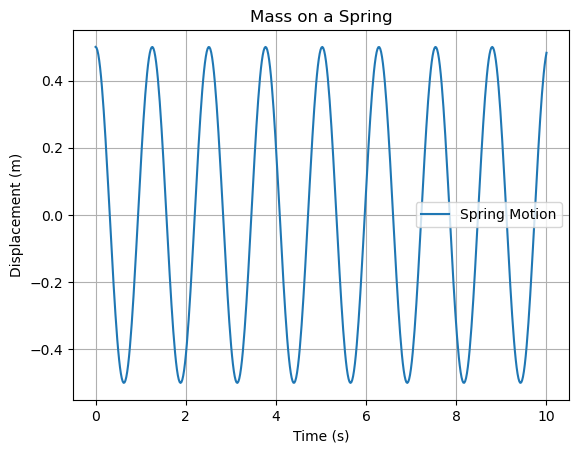

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def spring_motion(A, k, m, t_values):
    """
    Calculate the displacement x(t) of a mass on a spring at given time values.

    Parameters:
    A (float): Amplitude of motion (in meters).
    k (float): Spring constant (in N/m).
    m (float): Mass of the object (in kg).
    t_values (numpy.ndarray): Array of time values (in seconds).

    Returns:
    numpy.ndarray: Displacement x(t) at each time value.
    """
    # Calculate angular frequency ω
    omega = np.sqrt(k / m)
    
    # Compute displacement x(t)
    x_values = A * np.cos(omega * t_values)
    
    return x_values

def plot_motion(t, x):
    """
    Plot the displacement x(t) of a mass on a spring over time.

    Parameters:
    t (numpy.ndarray): Array of time values (in seconds).
    x (numpy.ndarray): Displacement values (in meters) corresponding to t.
    """
    plt.figure()
    plt.plot(t, x, label="Spring Motion")
    plt.xlabel("Time (s)")
    plt.ylabel("Displacement (m)")
    plt.title("Mass on a Spring")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage:
# Define parameters
A = 0.5  # Amplitude in meters
k = 50   # Spring constant in N/m
m = 2    # Mass in kg

# Create time values
t_values = np.linspace(0, 10, 500)  # Time from 0 to 10 seconds

# Compute displacement
x_values = spring_motion(A, k, m, t_values)

# Plot the motion
plot_motion(t_values, x_values)


# Question 2: Projectile Motion

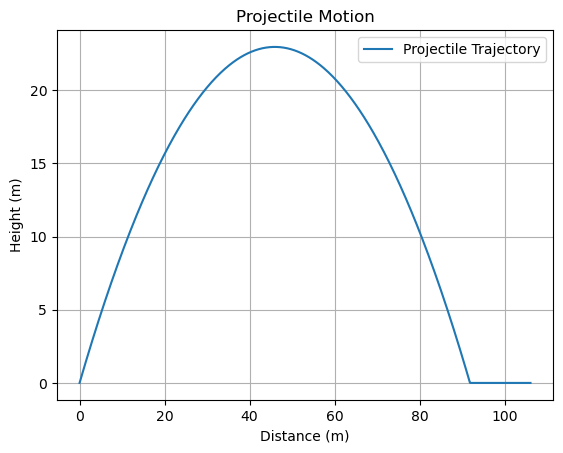

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def projectile_trajectory(v0, theta,  g=9.8, time_of_flight=5, steps = 500):
    """
    Calculate the trajectory of a projectile.

    Parameters:
    v0 (float): Initial velocity in m/s.
    theta (float): Angle of projection in degrees.
    time_of_flight: in seconds 
    g (float): Acceleration due to gravity, default is 9.8 m/s^2.

    Returns:
    tuple: Two lists containing x_positions and y_positions.
    """
    theta_rad = np.radians(theta)  # Convert angle to radians
    #time_of_flight = (2 * v0 * np.sin(theta_rad)) / g  # Total time of flight - a smart way of doing this
    time_steps = np.linspace(0, time_of_flight, num=steps)  # Create a range of time values

    x_positions = []
    y_positions = []

    for t in time_steps:
        # Calculate x and y positions
        x = v0 * np.cos(theta_rad) * t
        y = v0 * np.sin(theta_rad) * t - 0.5 * g * t**2

        if y < 0:  # Stop appending if the projectile hits the ground
            #print('projectile hits the ground at time beyond', t, 'seconds')
            #break #this also works
            y = 0.0 # just make the projectile sit on the ground
        
        x_positions.append(x)
        y_positions.append(y)

    return x_positions, y_positions

def plot_trajectory(x, y):
    """
    Plot the projectile trajectory.

    Parameters:
    x (list): x-positions of the projectile.
    y (list): y-positions of the projectile.
    """
    plt.figure()
    plt.plot(x, y, label="Projectile Trajectory")
    plt.xlabel("Distance (m)")
    plt.ylabel("Height (m)")
    plt.title("Projectile Motion")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
v0 = 30  # Initial speed in m/s
theta = 45  # Angle of projection in degrees

x, y = projectile_trajectory(v0, theta)
plot_trajectory(x, y)


# Question 3: Electric Field

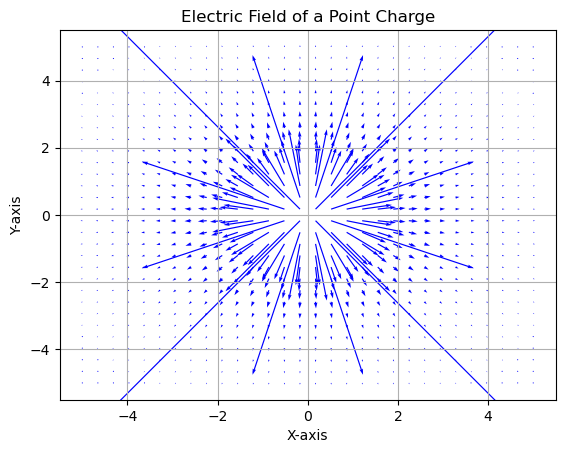

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def electric_field(q, x_array, y_array):
    """
    Calculate the electric field components (Ex, Ey) at each point (x, y).

    Parameters:
    q (float): Charge of the point source (in Coulombs).
    x_array (numpy.ndarray): 1D array of x-coordinates.
    y_array (numpy.ndarray): 1D array of y-coordinates.

    Returns:
    tuple: Two 2D numpy arrays Ex and Ey containing the electric field components at each grid point.
    """
    k = 9e9  # Coulomb's constant (Nm^2/C^2)
    
    # Initialize arrays for Ex and Ey
    Ex = np.zeros((len(y_array), len(x_array)))
    Ey = np.zeros((len(y_array), len(x_array)))
    
    # Compute the electric field components (Note you can also use np.meshgrid for this double for loo)
    for i in range(len(y_array)):
        for j in range(len(x_array)):
            x = x_array[j]
            y = y_array[i]
            r = np.sqrt(x**2 + y**2)  # Distance from the charge
            if r == 0:
                # Avoid division by zero at the origin
                Ex[i, j]=0
                Ey[i, j]=0  
            else:
                Ex[i, j] = k * q * x / r**3
                Ey[i, j] = k * q * y / r**3
    
    return Ex, Ey

def plot_field(x, y, Ex, Ey):
    """
    Plot the electric field using a quiver plot.

    Parameters:
    x (numpy.ndarray): 1D array of x-coordinates.
    y (numpy.ndarray): 1D array of y-coordinates.
    Ex (numpy.ndarray): 2D array of X-components of the electric field.
    Ey (numpy.ndarray): 2D array of Y-components of the electric field.
    """
    plt.figure()
    plt.quiver(x, y, Ex, Ey, scale=1e11, color="blue")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Electric Field of a Point Charge")
    plt.grid(True)
    plt.show()

# Example Usage:
# Define grid points
x = np.linspace(-5, 5, 30)  # X-coordinates
y = np.linspace(-5, 5, 30)  # Y-coordinates

# Define the charge (in Coulombs)
q = 1  # 1 Coulomb

# Calculate the electric field components
Ex, Ey = electric_field(q, x, y)

# Plot the electric field
plot_field(x, y, Ex, Ey)


# Question 4: Ideal Gas Law

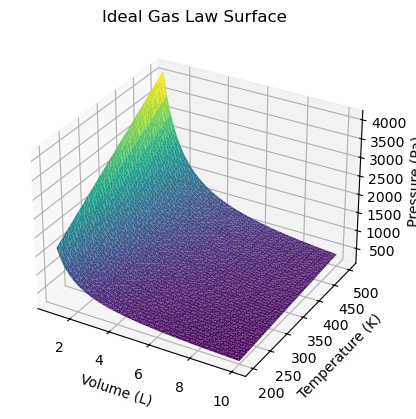

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# Credit -- solution by Rahul without using meshgrid

def calculate_pressure(V, T, n):
    """
    Calculate the pressure using the Ideal Gas Law (P = nRT/V).
    V: Volume (1D array)
    T: Temperature (1D array)
    n: Number of moles (constant)
    Returns: A 1D array of pressure values
    """
    R = 8.314  # Gas constant in J/(mol·K)
    return n * R * T / V

def plot_3d_surface(V, T, P):
    """
    Plot a 3D surface of pressure as a function of volume and temperature.
    V: 1D array of volume values
    T: 1D array of temperature values
    P: 2D array of pressure values calculated from volume and temperature
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    
    # Create the 3D surface plot manually using loops instead of mesh grid
    V_values = []
    T_values = []
    P_values = []

    for i in range(len(T)):
        for j in range(len(V)):
            V_values.append(V[j])
            T_values.append(T[i])
            P_values.append(P[i, j])

    # Plotting the surface
    ax.plot_trisurf(V_values, T_values, P_values, cmap="viridis")
    ax.set_xlabel("Volume (L)")
    ax.set_ylabel("Temperature (K)")
    ax.set_zlabel("Pressure (Pa)")
    ax.set_title("Ideal Gas Law Surface")
    plt.show()


# use of these functions ---
# Define arrays of volumes (L) and temperatures (K)
Vol = np.linspace(1, 10, 50)  # Volumes from 1 to 10 L
Tem = np.linspace(200, 500, 50)  # Temperatures from 200 to 500 K

# Define number of moles of gas
n_moles = 1.0  # 1 mole 

# Calculate the pressure values for each combination of volume and temperature using for loops
Pressure = np.zeros((len(Tem), len(Vol)))  # Create a 2D array for pressures

# Use nested loops to fill the pressure array
for i in range(len(Tem)):
    for j in range(len(Vol)):
        Pressure[i, j] = calculate_pressure(Vol[j], Tem[i], n_moles)

# Plot the 3D surface
plot_3d_surface(Vol, Tem, Pressure)


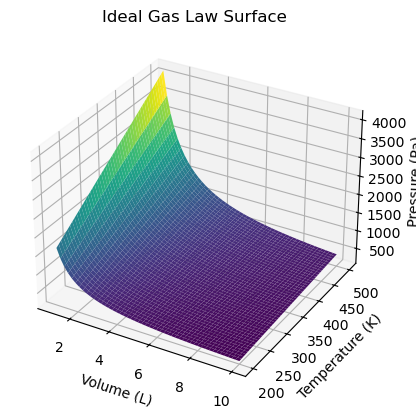

In [19]:
# another soluton using meshgrid

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_pressure(V, T, n):
    """
    Calculate pressure using the Ideal Gas Law.

    Parameters:
    V (numpy.ndarray): 1D array of volumes (L).
    T (numpy.ndarray): 1D array of temperatures (K).
    n (float): Number of moles of gas.

    Returns:
    numpy.ndarray: 2D array of pressures (Pa) for each (V, T) combination.
    """
    R = 8.314  # Gas constant (J/mol·K)
    V, T = np.meshgrid(V, T)  # Create a grid for V and T
    P = (n * R * T) / V  # Ideal Gas Law: P = nRT / V
    return P

def plot_3d_surface(V, T, P):
    """
    Create a 3D surface plot of pressure as a function of volume and temperature.

    Parameters:
    V (numpy.ndarray): 1D array of volumes (L).
    T (numpy.ndarray): 1D array of temperatures (K).
    P (numpy.ndarray): 2D array of pressures (Pa).
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    V, T = np.meshgrid(V, T)  # Ensure grid compatibility for plotting
    ax.plot_surface(V, T, P, cmap="viridis")
    ax.set_xlabel("Volume (L)")
    ax.set_ylabel("Temperature (K)")
    ax.set_zlabel("Pressure (Pa)")
    ax.set_title("Ideal Gas Law Surface")
    plt.show()

# Example Usage:
# Define arrays of volumes (L) and temperatures (K)
volumes = np.linspace(1, 10, 50)  # Volumes from 1 to 10 L
temperatures = np.linspace(200, 500, 50)  # Temperatures from 200 to 500 K

# Define number of moles of gas
moles = 1.0  # 1 mole

# Calculate pressure
pressures = calculate_pressure(volumes, temperatures, moles)

# Plot the 3D surface
plot_3d_surface(volumes, temperatures, pressures)